# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [2]:
def population_risk(a, sigma_eps):
    return (a - 1)**2 + sigma_eps**2 


### b)

In [3]:
# sampling
import numpy as np
n = 50
sigma_sq = 1
X = np.random.normal(size=(n,))
eps = np.random.normal(size=(n,), scale=np.sqrt(sigma_sq))
y = X + eps

In [4]:
y

array([ 0.82116116, -1.15728338,  0.95834338, -0.18859276, -2.68709998,
       -0.19907637,  1.44717224,  1.01172949,  0.22637879,  2.54750098,
       -0.34874772, -0.80612529, -0.13796205, -2.72769856, -1.78135222,
        0.16012834, -0.01952848,  0.60024164, -2.09141979,  0.08092679,
        0.73680523, -3.76218393,  1.25446097,  2.80262534, -2.46364403,
       -1.24892558,  0.38450335,  2.54444685,  2.50873696, -0.08025307,
        0.1641303 ,  0.09488016,  0.54909585,  0.42276086, -0.4410835 ,
       -0.13768692, -0.36422877,  1.73182935,  1.27371846, -2.4366178 ,
        0.22680827, -0.46748737,  1.76163615, -1.35930344,  2.18673606,
       -1.72793659,  1.29452525,  1.23799657, -0.28643121, -1.24473911])

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [5]:
def empirical_risk(a, x, y):
    y_hat = a*x
    return np.mean((y-y_hat)**2)

### c)

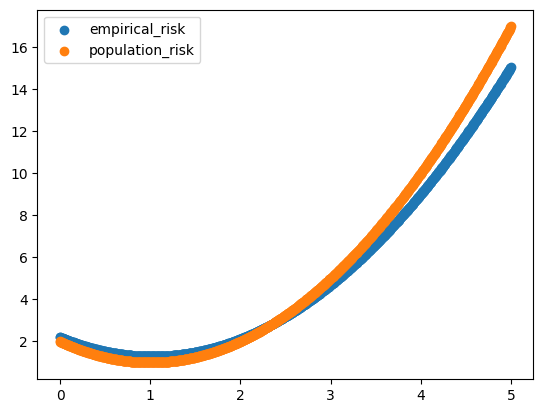

In [6]:
# code, plot
from matplotlib import pyplot as plt
import seaborn as sns
a_grid = np.linspace(0, 5, 1000)
empirical_risk_grid = [empirical_risk(a, X, y) for a in a_grid]
population_risk_grid = [population_risk(a, sigma_sq) for a in a_grid]

plt.scatter(a_grid, empirical_risk_grid)
plt.scatter(a_grid, population_risk_grid)
plt.legend(["empirical_risk", "population_risk"])
# empirical_risk(1, X, y)

In [7]:
from scipy.optimize import minimize

In [8]:
min_emp = minimize(empirical_risk, args=(X, y), x0=2)
min_pop = minimize(population_risk, x0=2, args=(sigma_sq))

In [9]:
argmin_emp = min_emp.x
min_emp_val = min_emp.fun

In [10]:
argmin_pop = min_pop.x
min_pop_val = min_pop.fun

In [11]:
population_risk(1, 1)

1

In [12]:
empirical_risk(9.994e-01, X, y)

1.2868327430568356

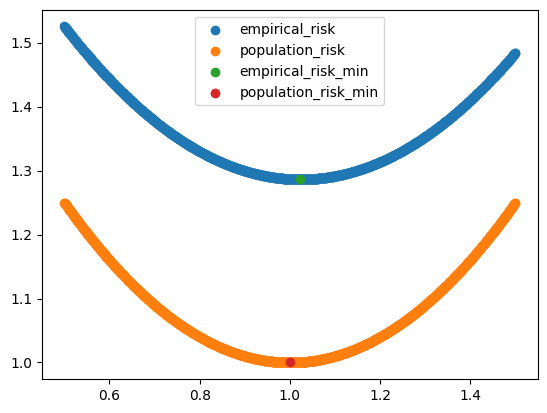

In [13]:
a_grid = np.linspace(0.5, 1.5, 1000)
empirical_risk_grid = [empirical_risk(a, X, y) for a in a_grid]
population_risk_grid = [population_risk(a, sigma_sq) for a in a_grid]

plt.scatter(a_grid, empirical_risk_grid)
plt.scatter(a_grid, population_risk_grid)
plt.scatter(argmin_emp, min_emp_val)
plt.scatter(argmin_pop, min_pop_val)
plt.legend(["empirical_risk", "population_risk", "empirical_risk_min", "population_risk_min"])

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [14]:
def generate_data(n, sigma_sq):
    X = np.random.normal(size=(n,))
    eps = np.random.normal(size=(n,), scale=np.sqrt(sigma_sq))
    y = X + eps
    return X, y

def min_emp(X, y):
    min_emp = minimize(empirical_risk, args=(X, y), x0=2)
    return min_emp.x, min_emp.fun

In [15]:
# excess risk
def excess_risk(a, sigma_sq):
    return population_risk(a, sigma_sq) -  population_risk(1, sigma_sq)

In [16]:
excess_risk(argmin_pop, sigma_sq)

array([0.])

In [17]:
# simulations with fixed sample size
L = 200
results = []
for _ in range(L):
    X, y = generate_data(50, 1)
    argmin, min = min_emp(X, y)
    results.append(excess_risk(argmin, sigma_sq))


In [18]:
sum(results)/len(results)

array([0.0185139])

In [19]:
# simulations for various sample sizes
Ls = range(100, 10000, 1000)
results = {i: [] for i in Ls}
for L in Ls:
    print(L)
    for _ in range(200):
        X, y = generate_data(L, 1)
        argmin, min = min_emp(X, y)
        results[L].append(excess_risk(argmin, sigma_sq).item())

100
1100
2100
3100
4100
5100
6100
7100
8100
9100


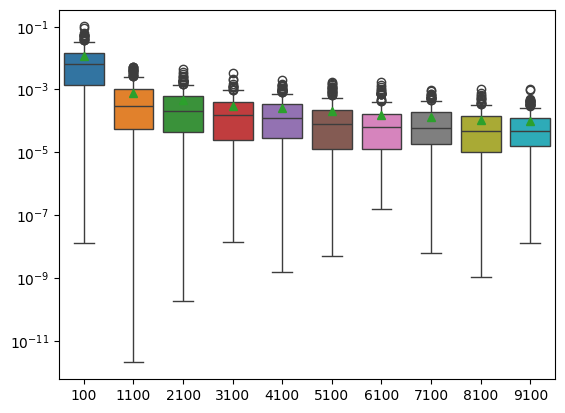

In [23]:
sns.boxplot(results, showmeans=True)
plt.yscale('log')